## Imp Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import time 
from datetime import date

# Dataset

A sales data record of 5000000* 14, with columns Region, Country, Item Type, Sales Channel, Order Priority, Order Date, Order ID, Ship date, units sold, unit price, unit cost, Total Revenue, Total Cost, Total Profit. 

No NA/ NAN is present in the dataset. 

The data is taken from http://eforexcel.com/wp/downloads-18-sample-csv-files-data-sets-for-testing-sales/ 

## Pandas

Pandas is probably the most popular method of reading datasets and is also the default on Kaggle. It has a lot of options, flexibility and functions for reading and processing data.

In [ ]:
link  = '/content/drive/MyDrive/5m.csv'

In [ ]:
import pandas as pd          #Hardware Accelerator: TPU
start = time.time()
df = pd.read_csv(link)
end = time.time() 
print(end-start)

10.771544694900513


In [ ]:
df.shape

(5000000, 14)

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1563555.21,1260428.96,303126.25
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183.00,296918.60,146264.40
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.70,117.11,21187.10,12062.33,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748.12,137780.16,77967.96
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.70,117.11,1445453.90,822931.97,622521.93


## Dask
Dask provides a framework to scale pandas workflows natively using a parallel processing architecture. For those of you who have used Spark, you will find an uncanny similarity between the two.



In [ ]:
pip install dask[complete]

In [ ]:
import dask.dataframe as dd       #Hardware Accelerator: TPU
start = time.time()
df = dd.read_csv(link).compute()
end = time.time()
print(end-start)

13.538600444793701


In [ ]:
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1563555.21,1260428.96,303126.25
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183.00,296918.60,146264.40
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.70,117.11,21187.10,12062.33,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748.12,137780.16,77967.96
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.70,117.11,1445453.90,822931.97,622521.93


## Datatable
Datatable (heavily inspired by R's data.table) can read large datasets fairly quickly and is often faster than pandas. It is specifically meant for data processing of tabular datasets with emphasis on speed and support for large sized data.

In [ ]:
pip install datatable

In [ ]:
import datatable as dt        #Hardware Accelerator: TPU
start = time.time()
df = dt.fread(link)
end = time.time()
print(end-start)

4.387416839599609


In [ ]:
df.head(5)

   | Region                        Country  Item Type        Sales Channel  Order Priority  Order Date   Order ID  …
-- + ----------------------------  -------  ---------------  -------------  --------------  ----------  ---------   
 0 | Australia and Oceania         Palau    Office Supplies  Online         H               3/6/2016    517073523  …
 1 | Europe                        Poland   Beverages        Online         L               4/18/2010   380507028  …
 2 | North America                 Canada   Cereal           Online         M               1/8/2015    504055583  …
 3 | Europe                        Belarus  Snacks           Online         C               1/19/2014   954955518  …
 4 | Middle East and North Africa  Oman     Cereal           Offline        H               4/26/2019   970755660  …

[5 rows x 14 columns]


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1.56356e+06,1.26043e+06,303126
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183,296919,146264
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.7,117.11,21187.1,12062.3,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748,137780,77968
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.7,117.11,1.44545e+06,822932,622522


In [ ]:
df.shape

(5000000, 14)

Format: feather
It is common to store data in feather (binary) format specifically for pandas. It significantly improves reading speed of datasets.

## Modin

A library which helps pandas to read big files and boosts its speed. All syntax is same as pandas.

In [ ]:
pip install modin[dask]

In [ ]:
import modin.pandas as mpd     #Hardware Accelerator: TPU
start = time.time()
df = mpd.read_csv(link)
end = time.time()
print(end-start)

10.028507709503174


In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1563555.21,1260428.96,303126.25
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183.00,296918.60,146264.40
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.70,117.11,21187.10,12062.33,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748.12,137780.16,77967.96
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.70,117.11,1445453.90,822931.97,622521.93


# Hardware

In [ ]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
#no.of sockets i.e available slots for physical processors
!lscpu | grep 'Socket(s):'

Socket(s):           1


In [ ]:
!lscpu | grep 'Core(s) per socket:'

Core(s) per socket:  1


In [ ]:
!lscpu | grep 'Thread(s) per core'
 

Thread(s) per core:  2


In [ ]:
!lscpu | grep "L3 cache"

L3 cache:            46080K


In [ ]:
!lscpu | grep "MHz"

CPU MHz:             2299.998


In [ ]:
!free -h --si | awk  '/Mem:/{print $2}'

13G


In [ ]:
!df -h / | awk '{print $4}'

Avail
75G






## Time analysis
Pandas    = 10.77 sec.

Dask      = 13.55 sec.

Datatable = 4.38 sec.

Modin     = 10.00 sec.

Dask> pandas > Modin > Datatable

1. The Datatable toolkit resembeles pandas very closely but is more focused on speed.

2. You can also convert datatble frame to pandas frame by using command data.to_pandas() . 

3. Modin is a library which sits on top of pandas and makes it computations faster then alone pandas but its still slower than datatable. It runs on all the CPU cores.

4. Pandas can use only single CPU at a time where as Modin can use all cpu core. 

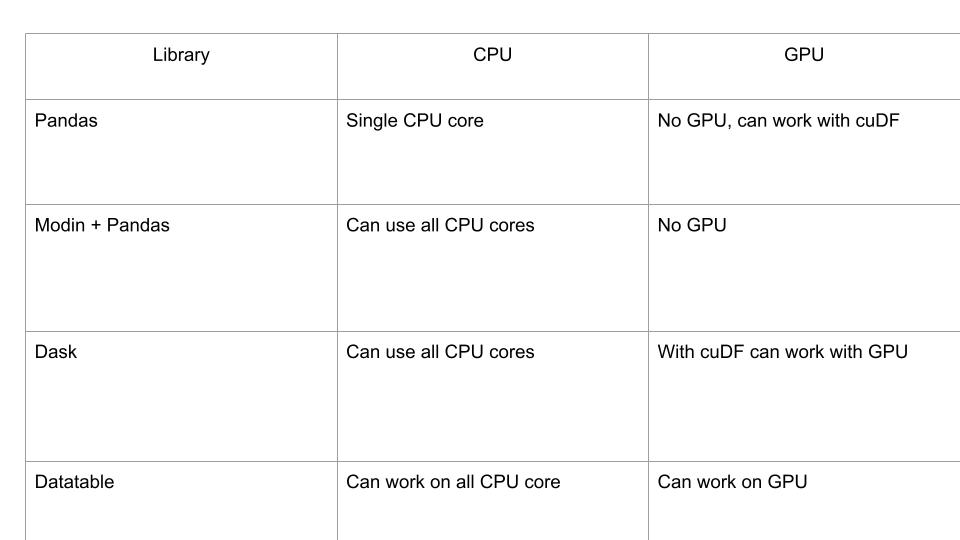

# Conclusion

If dataset is huge like more than like have 100 million rows prefer using Datatable, if dataset if of normal size than pandas with modin or simple pandas would work fine.